In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

**We have the updated dataframes after data accessing and data cleaning.**

In [2]:
df = pd.read_csv('../dataframes/marketing_digital_after_accessing_cleaning_with_specific_dtypes.csv')
df = df.astype({
    'month': 'category',
    'day': 'int16',
    'campaign_number': 'category',
    'user_engagement': 'category',
    'displays': 'int32',
    'cost': 'float16',
    'clicks': 'int16',
    'revenue': 'float16',
    'post_click_conversions': 'int16',
    'post_click_sales_amount': 'float32',
    'updated_placement': 'category',
    'banner_width': 'int64',
    'banner_height': 'int64',
    'banner_area': 'int64'
})
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,abc,160,600,96000
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,def,160,600,96000


In [3]:
df.shape

(15403, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   month                    15403 non-null  category
 1   day                      15403 non-null  int16   
 2   campaign_number          15403 non-null  category
 3   user_engagement          15403 non-null  category
 4   displays                 15403 non-null  int32   
 5   cost                     15403 non-null  float16 
 6   clicks                   15403 non-null  int16   
 7   revenue                  15403 non-null  float16 
 8   post_click_conversions   15403 non-null  int16   
 9   post_click_sales_amount  15403 non-null  float32 
 10  updated_placement        15403 non-null  category
 11  banner_width             15403 non-null  int64   
 12  banner_height            15403 non-null  int64   
 13  banner_area              15403 non-null  int64   
dtypes: cat

***EDA***

**Column Types**
- Categorical : month,campaign_number,user_engagement,updated_placement
- Numerical : day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,banner_width,banner_height,banner_area


**Q1) What is the overall trend in user engagement throughout the campaign period?**

In [5]:
df['user_engagement'].value_counts()

user_engagement
Medium    5489
Low       5033
High      4881
Name: count, dtype: int64

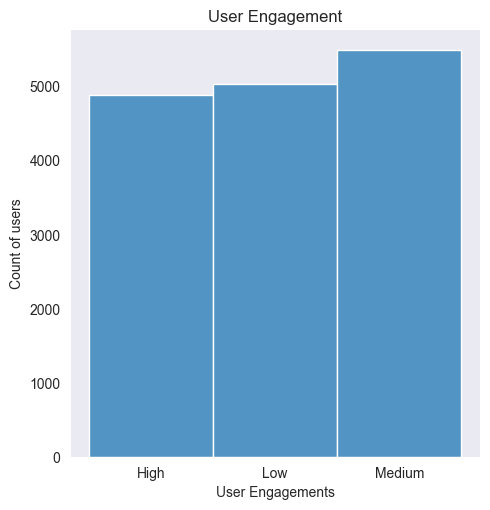

In [6]:
sns.displot(data = df, x = 'user_engagement', kind = 'hist')
plt.title('User Engagement')
plt.xlabel('User Engagements')
plt.ylabel('Count of users')
plt.show()

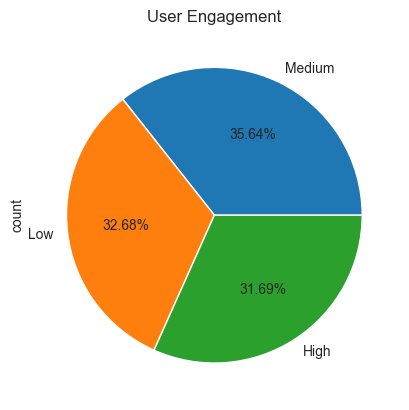

In [7]:
df['user_engagement'].value_counts().plot(kind='pie',autopct='%0.02f%%')
plt.title('User Engagement')
plt.show()

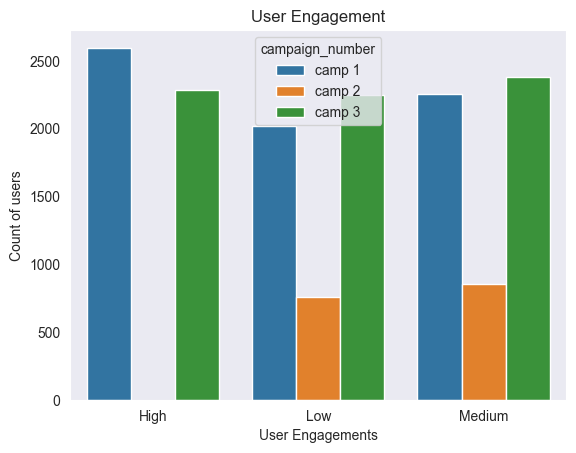

In [8]:
sns.countplot(data = df,x = 'user_engagement',hue = 'campaign_number')
plt.title('User Engagement')
plt.xlabel('User Engagements')
plt.ylabel('Count of users')
plt.show()

In [9]:
cross_tab = pd.crosstab(df['user_engagement'],df['campaign_number'])

In [10]:
cross_tab

campaign_number,camp 1,camp 2,camp 3
user_engagement,,,
High,2597,0,2284
Low,2023,761,2249
Medium,2253,853,2383


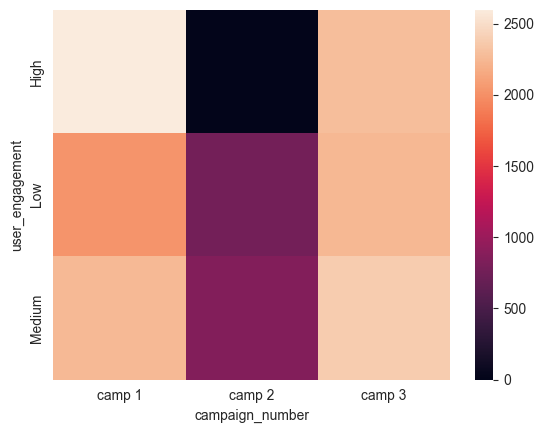

In [11]:
sns.heatmap(cross_tab)
plt.show()

**Conclusions on User Engagements**
- Medium engagements slightly surpass both Low and High user engagements, holding a slight edge in comparison.
- Examining the data in terms of campaign numbers:
  1. For Campaign 1, user engagements are nearly equal across categories but show a slight edge in High engagements.
  2. Campaign 2 records engagements primarily in Low and Medium categories.
  3. In the case of Campaign 3, engagements are nearly balanced across all types.
- The camp 1 category, exhibiting high user engagement, is characterized by the maximum number of user engagements observed in the heatmap.
- The camp 2 category, marked by high user engagement, registers zero values in the heatmap.


**Q2) How does the size of the ad (banner) impact the number of clicks generated?**

In [12]:
df2 = pd.read_csv('../dataframes/online_advertising_performance_data.csv')
df['banner'] = df2['banner']
df['banner'] = df['banner'].astype('category')

In [13]:
df[['banner','clicks']] #categorical vs numerical

,banner,clicks
0,160 x 600,0
1,160 x 600,158
2,160 x 600,158
3,160 x 600,1796
4,160 x 600,1
...,...,...
15398,728 x 90,40
15399,728 x 90,22
15400,728 x 90,8
15401,728 x 90,195


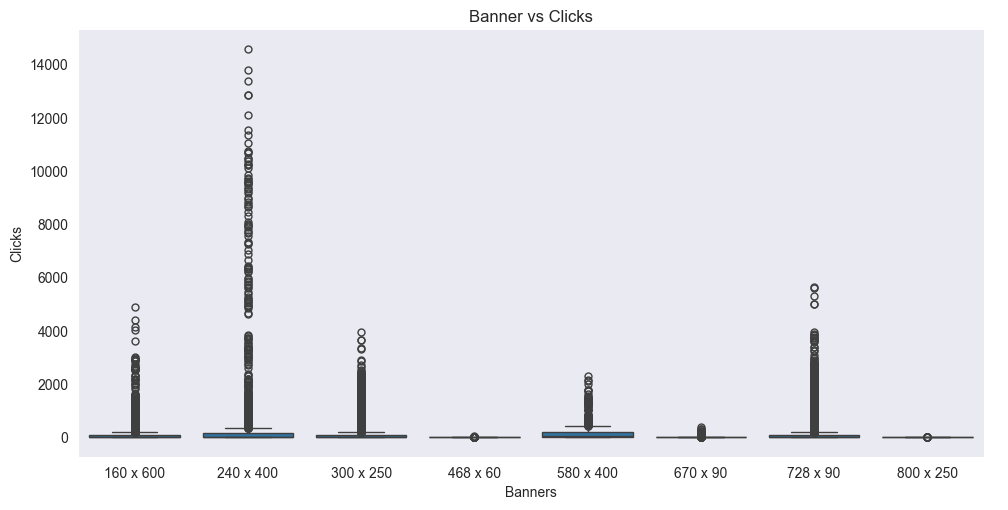

In [14]:
sns.catplot(kind = 'box',data = df,x = 'banner',y = 'clicks',aspect=2)
plt.title('Banner vs Clicks')
plt.xlabel('Banners')
plt.ylabel('Clicks')
plt.show()

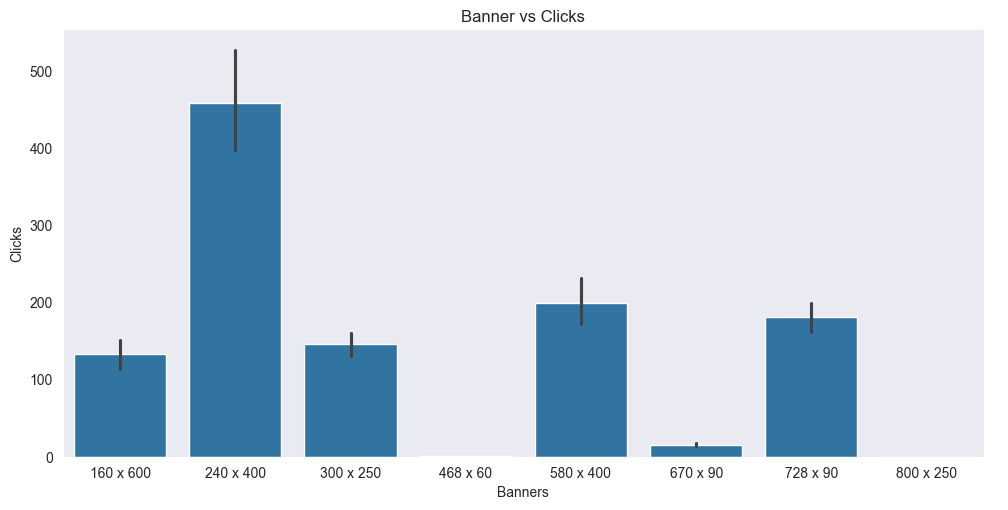

In [15]:
sns.catplot(kind = 'bar',data = df,x = 'banner',y = 'clicks',aspect=2)
plt.title('Banner vs Clicks')
plt.xlabel('Banners')
plt.ylabel('Clicks')
plt.show()

In [16]:
df.pivot_table(index = 'banner',values='clicks',aggfunc=['mean','median','sum','max','min'])

,mean,median,sum,max,min
,clicks,clicks,clicks,clicks,clicks
banner,,,,,
160 x 600,132.867443,7.0,239560,4884,0
240 x 400,459.263201,31.0,1113254,14566,0
300 x 250,145.820567,12.0,411214,3958,0
468 x 60,0.681938,0.0,1295,35,0
580 x 400,199.143564,52.0,120681,2315,0
670 x 90,15.817602,2.0,37203,377,0
728 x 90,181.287715,11.0,569606,5634,0
800 x 250,0.033613,0.0,12,2,0


**Two columns : Mean and Sum Clicks of utmost importance.**

In [17]:
banner_clicks = df.pivot_table(index = 'banner',values='clicks',aggfunc=['mean','sum'])

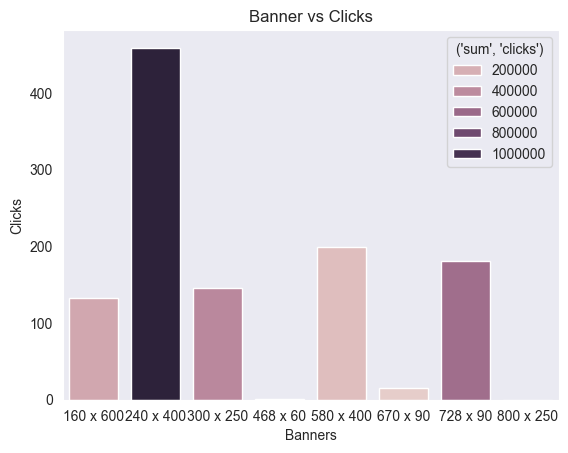

In [73]:
sns.barplot(x=banner_clicks.index, y = ('mean', 'clicks'), data=banner_clicks , hue = ('sum', 'clicks'))
plt.title('Banner vs Clicks')
plt.xlabel('Banners')
plt.ylabel('Clicks')
plt.show()

**Conclusions on Size of Ad(Banner) vs Clicks**
- As shown in the boxplot, there are numerous outliers in each section regarding the size of the ad and the number of clicks.
- For each section, the barplot illustrates the mean central tendency along with a 95% Confidence Interval.
- The category 240 x 400 exhibits the highest mean and sum of the number of clicks, followed by approximately equal values for other sections.
- However, the mean for categories 468 x 60 and 800 x 250 is nearly zero.
- Hence, the distribution of mean clicks versus the size of the ad is *non-uniform*, as evident from the bar plot generated from the pivot table.


**Q3) Which publisher spaces (placements) yielded the highest number of displays and clicks?**

In [19]:
df[['updated_placement','clicks','displays']]

,updated_placement,clicks,displays
0,abc,0,4
1,def,158,20170
2,ghi,158,14701
3,mno,1796,171259
4,def,1,552
...,...,...,...
15398,def,40,5963
15399,ghi,22,710
15400,jkl,8,490
15401,mno,195,37790


**We would not consider 'No Data Available' Section.**

In [20]:
q3_df = df[df['updated_placement'].isin(['abc','def','ghi','jkl','mno'])]

In [21]:
q3_df[['updated_placement','clicks','displays']]

,updated_placement,clicks,displays
0,abc,0,4
1,def,158,20170
2,ghi,158,14701
3,mno,1796,171259
4,def,1,552
...,...,...,...
15397,abc,6,911
15398,def,40,5963
15399,ghi,22,710
15400,jkl,8,490


In [22]:
updated_index = q3_df['updated_placement'] != 'No Data Available'
q3_df.pivot_table(index = 'updated_placement',values=['clicks','displays'],aggfunc=['mean','sum','max','min'])

mean                    sum                 max  \
                       clicks      displays   clicks   displays   clicks   
updated_placement                                                          
abc                  1.636364    250.146694     1584     242142     91.0   
def                 49.786542   7966.152954   176095   28176283   1436.0   
ghi                358.141585  17156.920735  1247049   59740398  14566.0   
jkl                 29.977236   3072.177316    75063    7692732   1076.0   
mno                220.722160  31820.301623   993029  143159537   5634.0   
No Data Available         NaN           NaN        0          0      NaN   

                               min           
                   displays clicks displays  
updated_placement                            
abc                 13709.0    0.0      0.0  
def                 90466.0    0.0      1.0  
ghi                442067.0    0.0      0.0  
jkl                 68918.0    0.0      1.0  
mno                455986.0    0.0      1.0  
No Data Available       NaN    NaN      NaN

In [23]:
placements_clicks_displays = q3_df.pivot_table(index = 'updated_placement',values=['clicks','displays'],aggfunc=['mean','sum','max'])
placements_clicks_displays

mean                    sum                 max  \
                       clicks      displays   clicks   displays   clicks   
updated_placement                                                          
abc                  1.636364    250.146694     1584     242142     91.0   
def                 49.786542   7966.152954   176095   28176283   1436.0   
ghi                358.141585  17156.920735  1247049   59740398  14566.0   
jkl                 29.977236   3072.177316    75063    7692732   1076.0   
mno                220.722160  31820.301623   993029  143159537   5634.0   
No Data Available         NaN           NaN        0          0      NaN   

                             
                   displays  
updated_placement            
abc                 13709.0  
def                 90466.0  
ghi                442067.0  
jkl                 68918.0  
mno                455986.0  
No Data Available       NaN

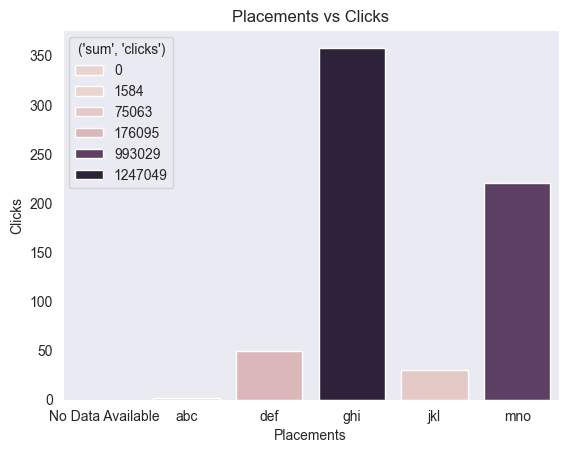

In [24]:
sns.barplot(x=placements_clicks_displays.index, y = ('mean', 'clicks'), data = placements_clicks_displays , hue = ('sum', 'clicks'))
plt.title('Placements vs Clicks')
plt.xlabel('Placements')
plt.ylabel('Clicks')
plt.show()

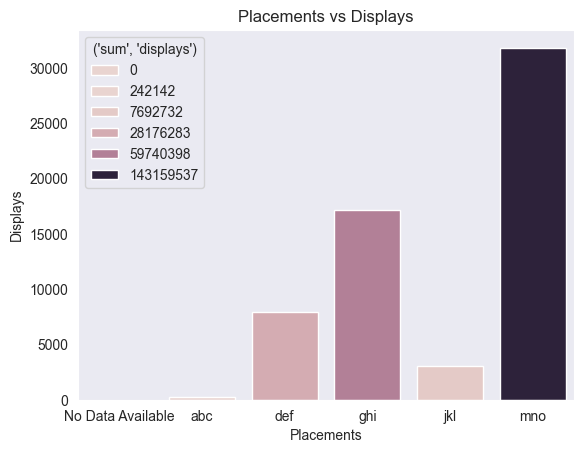

In [25]:
sns.barplot(x=placements_clicks_displays.index, y = ('mean', 'displays'), data = placements_clicks_displays , hue = ('sum', 'displays'))
plt.title('Placements vs Displays')
plt.xlabel('Placements')
plt.ylabel('Displays')
plt.show()

**Conclusions regarding the association between publisher placements and displays as well as clicks.**
- The publisher "GHI" stands out with the highest mean and sum of clicks, while "ABC" lags behind with the least.
- The publisher "MNO" achieves the highest mean and total number of displays, while "ABC" yields the lowest.

In [26]:
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area,banner
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,abc,160,600,96000,160 x 600
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000,160 x 600
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000,160 x 600
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000,160 x 600
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,def,160,600,96000,160 x 600


**Q4) Is there a correlation between the cost of serving ads and the revenue generated from clicks?**

In [27]:
df[['cost','revenue']] # Numerical vs Numerical

,cost,revenue
0,0.006001,0.000000
1,26.781250,28.968750
2,27.625000,28.984375
3,216.875000,329.500000
4,0.067017,0.183350
...,...,...
15398,0.788574,2.251953
15399,0.986816,1.238281
15400,0.168579,0.450439
15401,2.601562,10.976562


**First we will check distribution of cost and revenue separately**

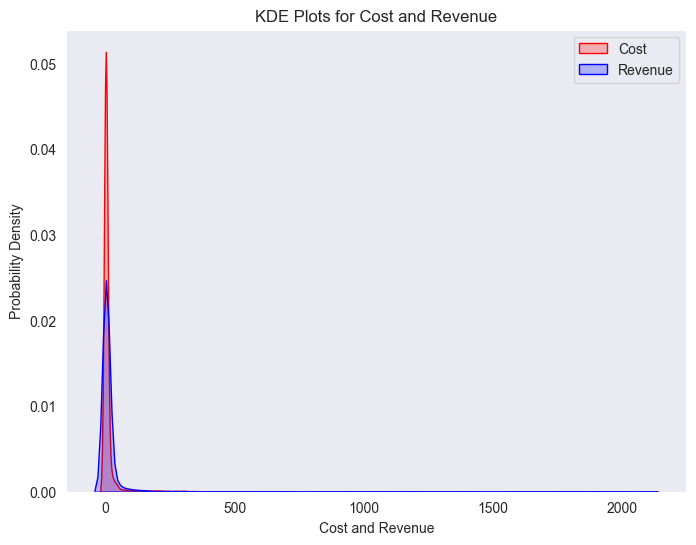

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data = df,x = 'cost',color='r',fill = True,label = 'Cost')
sns.kdeplot(data = df,x = 'revenue',color='b',fill = True,label = 'Revenue')
plt.title('KDE Plots for Cost and Revenue')
plt.xlabel('Cost and Revenue')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [29]:
q4_df = df
q4_df['cost'] = q4_df['cost'].astype('float64')
q4_df['cost'].skew()
q4_df['revenue'] = q4_df['revenue'].astype('float64')
q4_df['revenue'].skew()

12.806602570292348

In [30]:
q4_df['cost'].skew()

6.052345780144212

In [31]:
df['cost'].kurtosis()

41.08256125498723

In [32]:
df['revenue'].kurtosis()

206.43311710310172

**Plots : Scatterplot,2D Histogram,2D Kdeplot**


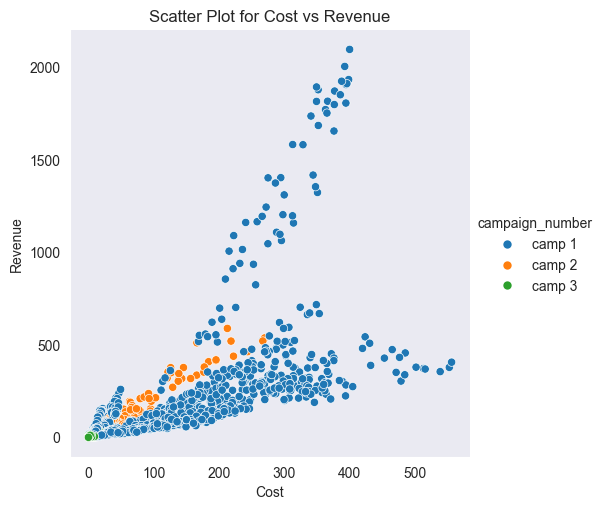

In [33]:
sns.relplot(kind = 'scatter',data = df,x = df['cost'],y = df['revenue'],color = 'red',hue = 'campaign_number')
plt.title('Scatter Plot for Cost vs Revenue')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()

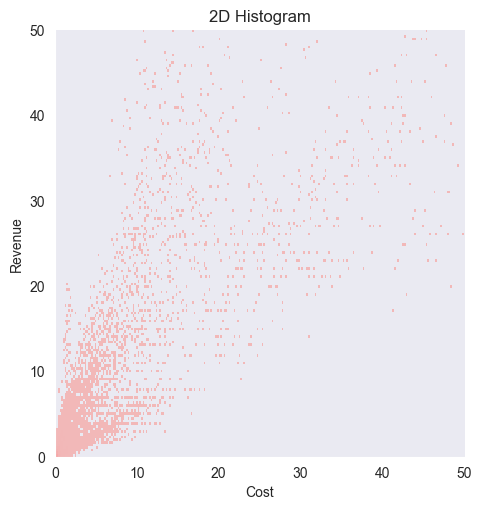

In [34]:
sns.displot(kind = 'hist',data = df,x = 'cost',y = 'revenue',color = 'red')
plt.xlim(0,50)
plt.ylim(0,50)
plt.title('2D Histogram')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()

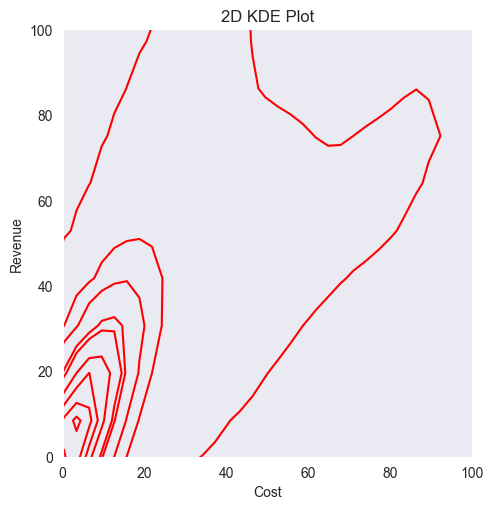

In [35]:
sns.displot(kind = 'kde',data = df,x = 'cost',y = 'revenue',color = 'red')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('2D KDE Plot')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()

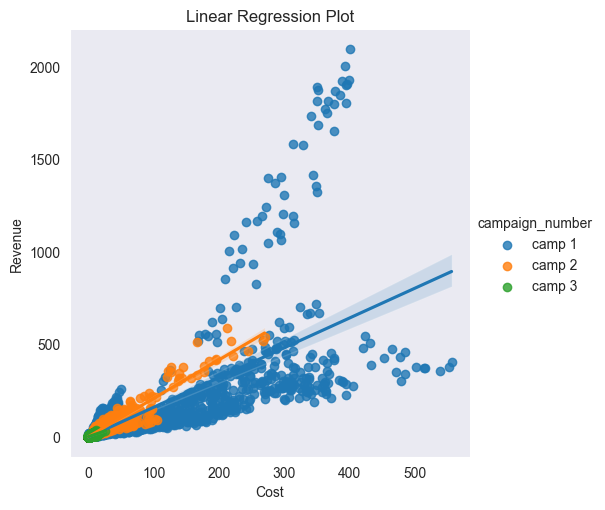

In [36]:
sns.lmplot(data = df , x = 'cost',y = 'revenue',hue = 'campaign_number')
plt.title('Linear Regression Plot')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()

**Correlation Coefficient**

In [37]:
corr_coeff = df['cost'].corr(df['revenue'])
corr_coeff

0.7605140612744526

**Conclusions for relationship between the cost of serving ads and the revenue generated from clicks.**
- Both the cost and revenue exhibit positive skewness and kurtosis.
- The scatterplot illustrates a positive correlation coefficient.
- A correlation coefficient of 0.7605 indicates strong positive linear relationship between cost and revenue.
- Some outliers show notably high costs paired with low revenue, deviating significantly from the linear regression plot's expected values.


**Q5)What is the average revenue generated per click for Company X during the campaign period?**

In [38]:
df.head()

,month,day,campaign_number,user_engagement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,updated_placement,banner_width,banner_height,banner_area,banner
0,April,1,camp 1,High,4,0.006001,0,0.000000,0,0.000000,abc,160,600,96000,160 x 600
1,April,1,camp 1,High,20170,26.781250,158,28.968750,23,1972.460205,def,160,600,96000,160 x 600
2,April,1,camp 1,High,14701,27.625000,158,28.984375,78,2497.263672,ghi,160,600,96000,160 x 600
3,April,1,camp 1,High,171259,216.875000,1796,329.500000,617,24625.324219,mno,160,600,96000,160 x 600
4,April,1,camp 1,Low,552,0.067017,1,0.183350,0,0.000000,def,160,600,96000,160 x 600


In [39]:
df['revenue_per_click'] = (df['revenue'] / df['clicks']).fillna(0)

In [40]:
df['revenue'].mean()

17.935662496262523

In [41]:
revenue_campaign_number = df.pivot_table(index = 'campaign_number',values = ['revenue_per_click','revenue'],aggfunc='mean')
revenue_campaign_number

,revenue,revenue_per_click
campaign_number,,
camp 1,33.542029,0.099670
camp 2,21.617063,0.031214
camp 3,1.567193,0.034890


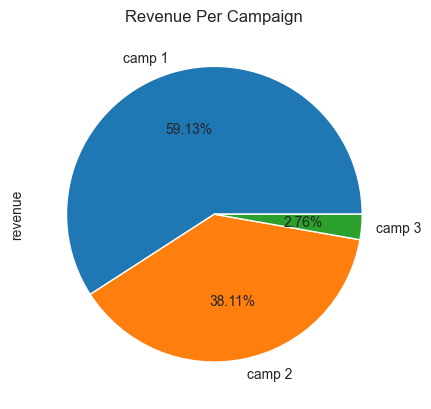

In [42]:
revenue_campaign_number['revenue'].plot(kind = 'pie',autopct = '%0.02f%%')
plt.title('Revenue Per Campaign')
plt.show()

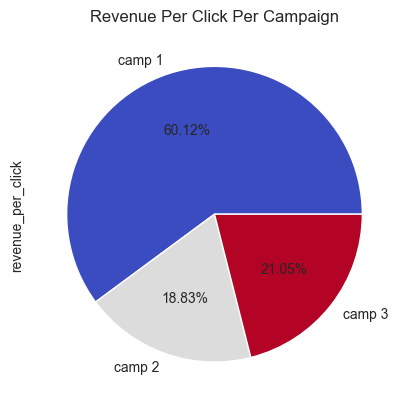

In [76]:
revenue_campaign_number['revenue_per_click'].plot(kind = 'pie',autopct = '%0.02f%%',cmap= 'coolwarm')
plt.title('Revenue Per Click Per Campaign')
plt.show()

**Conclusions for average revenue generated per click during the campaign period.**
- The mean revenue generated per click for Company X during the campaign period is approximately 17.94.
- The pie chart highlights that Campaign 1 boasts the highest mean revenue generated per campaign, while Campaign 3 records the lowest.
- The pie chart illustrates the variability in the average revenue per click across campaigns, showcasing Campaign 1 with the highest mean revenue per click and Campaign 2 with the lowest.

**Q6) Which campaigns had the highest post-click conversion rates?**

In [44]:
df[['campaign_number','post_click_conversions']]

,campaign_number,post_click_conversions
0,camp 1,0
1,camp 1,23
2,camp 1,78
3,camp 1,617
4,camp 1,0
...,...,...
15398,camp 3,3
15399,camp 3,0
15400,camp 3,0
15401,camp 3,0


**Firstly we would compute the overall post-click conversion rates across all the three campaigns 1,2 and 3.**

In [45]:
overall_post_click_conversion_rate = ((df['post_click_conversions'].sum()) / (df['clicks'].sum())) * 100
overall_post_click_conversion_rate

26.145517635614212

**Now we would compute campaign wise post-click conversions rate.**

In [46]:
campaign_post_conversions = df.pivot_table(index = 'campaign_number',values = ['clicks','post_click_conversions'],aggfunc='sum')
campaign_post_conversions['post_click_conversions_rate'] = (campaign_post_conversions['post_click_conversions'] / campaign_post_conversions['clicks']) * 100
campaign_post_conversions

,clicks,post_click_conversions,post_click_conversions_rate
campaign_number,,,
camp 1,1409126,633082,44.927281
camp 2,881158,13767,1.562376
camp 3,202541,4913,2.425682


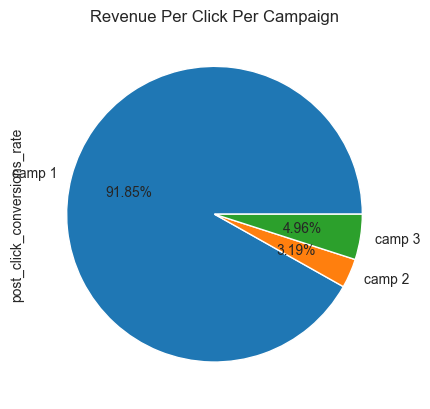

In [47]:
campaign_post_conversions['post_click_conversions_rate'].plot(kind = 'pie',autopct = '%0.02f%%')
plt.title('Revenue Per Click Per Campaign')
plt.show()

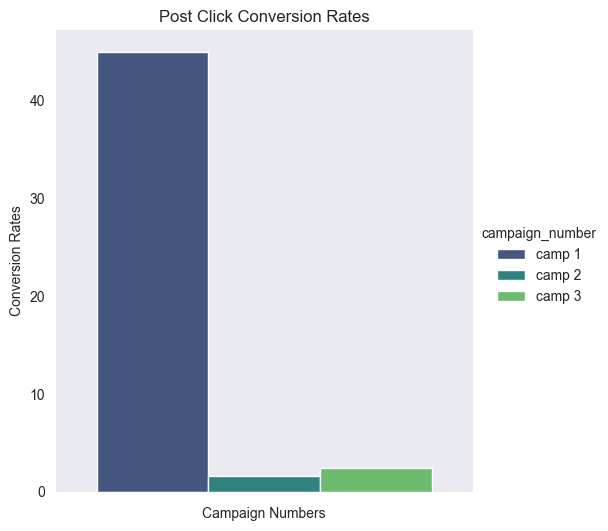

In [84]:
sns.catplot(kind='bar', hue=campaign_post_conversions.index, y=campaign_post_conversions['post_click_conversions_rate'], color='red', palette='viridis',legend = True)
plt.title('Post Click Conversion Rates')
plt.xlabel('Campaign Numbers')
plt.ylabel('Conversion Rates')
plt.show()

**The conclusions regarding the highest post-click conversion rates in relation to the campaigns.**
- The aggregate post-click conversion rate for all campaigns combined is approximately 26.15%.
- Indeed, based on the data, it is evident that Campaign 1 exhibits the highest post-click conversion rate (44.93%), demonstrating clear dominance over Campaigns 2 and 3 in terms of driving on-site transactions following ad clicks.

**Q7) Are there any specific trends or patterns in post-click sales amounts over time?**

In [49]:
df.pivot_table(index = ['month','day'],values = 'post_click_sales_amount',aggfunc='sum')['post_click_sales_amount'].sort_values(ascending=False)

month  day
April  5      575301.437500
       4      537908.750000
May    16     535943.062500
April  1      531308.812500
       3      530984.937500
                  ...      
June   19     198862.765625
       18     181975.156250
       25     177379.890625
April  31          0.000000
June   31          0.000000
Name: post_click_sales_amount, Length: 93, dtype: float32

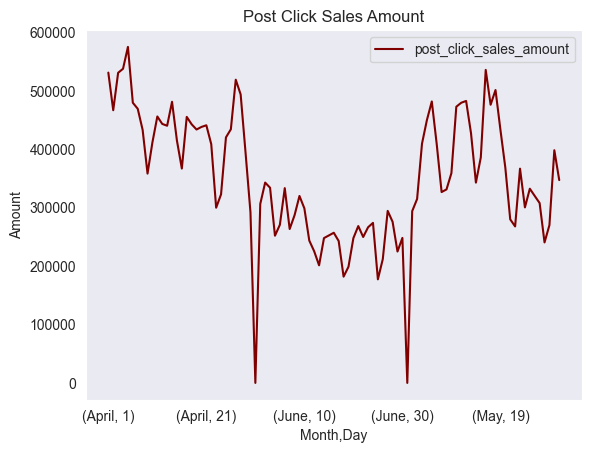

In [50]:
df.pivot_table(index = ['month','day'],values = 'post_click_sales_amount',aggfunc='sum').plot(color = 'maroon')
plt.title('Post Click Sales Amount')
plt.xlabel('Month,Day')
plt.ylabel('Amount')
plt.show()

In [51]:
month_day_camp_num_post_sales_amt = df.pivot_table(index = ['month','day','campaign_number'],values = 'post_click_sales_amount',aggfunc='sum')
month_day_camp_num_post_sales_amt

post_click_sales_amount
month day campaign_number                         
April 1   camp 1                     445793.250000
          camp 2                      79183.890625
          camp 3                       6331.658203
      2   camp 1                     423644.750000
          camp 2                      35166.296875
...                                            ...
May   30  camp 2                          0.000000
          camp 3                       4590.791992
      31  camp 1                     341412.906250
          camp 2                          0.000000
          camp 3                       5874.716797

[279 rows x 1 columns]

In [52]:
mon_day_camp_sales_amt = df.pivot_table(index=['month', 'day'], columns='campaign_number', values='post_click_sales_amount', aggfunc='sum')
mon_day_camp_sales_amt

campaign_number        camp 1        camp 2       camp 3
month day                                               
April 1          445793.25000  79183.890625  6331.658203
      2          423644.75000  35166.296875  8097.939453
      3          478185.28125  46597.472656  6202.165039
      4          484009.21875  48424.988281  5474.532715
      5          516325.46875  53007.300781  5968.636719
...                       ...           ...          ...
May   27         304226.46875      0.000000  3703.877197
      28         237837.53125      0.000000  2688.443848
      29         267344.25000      0.000000  2832.039307
      30         393825.75000      0.000000  4590.791992
      31         341412.90625      0.000000  5874.716797

[93 rows x 3 columns]

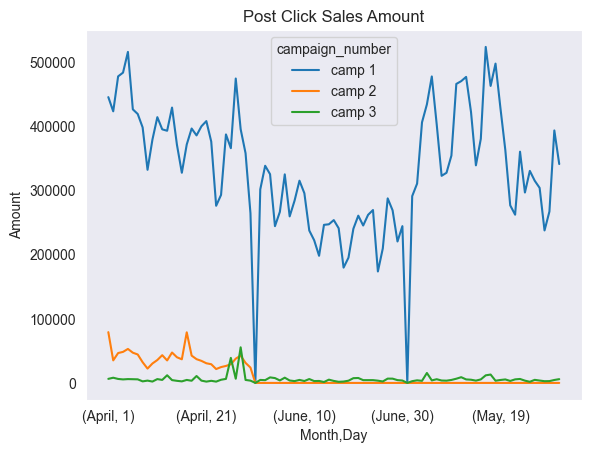

In [53]:
mon_day_camp_sales_amt.plot()
plt.title('Post Click Sales Amount')
plt.xlabel('Month,Day')
plt.ylabel('Amount')
plt.show()

**Conclusions regarding particular patterns observed in post-click sales amounts over time.**
- Sales amounts reach their peak around April 4-5 and decrease notably around April 30.
- Following April 30, there's a subsequent increase in sales amounts, yet they fail to exceed their initial peak before declining back to zero around June 30.
- Following the decline around June 30, sales amounts experience a resurgence, reaching their second highest peak around May 16, and subsequently fluctuate with typical ups and downs.
- Campaign 1 significantly outperforms in post-click sales amount, followed by Campaign 2 and Campaign 3, which generate nearly equal sales but substantially less compared to Campaign 1.

**Q8) How does the level of user engagement vary across different banner sizes?**

In [54]:
df[['user_engagement','banner']] # Categorical vs Categorical

,user_engagement,banner
0,High,160 x 600
1,High,160 x 600
2,High,160 x 600
3,High,160 x 600
4,Low,160 x 600
...,...,...
15398,Medium,728 x 90
15399,Medium,728 x 90
15400,Medium,728 x 90
15401,Medium,728 x 90


In [55]:
user_banner = pd.crosstab(df['user_engagement'],df['banner'])
user_banner

banner,160 x 600,240 x 400,300 x 250,468 x 60,580 x 400,670 x 90,728 x 90,800 x 250
user_engagement,,,,,,,,
High,573,728,872,637,182,728,1018,143
Low,588,848,949,563,212,777,1007,89
Medium,642,848,999,699,212,847,1117,125


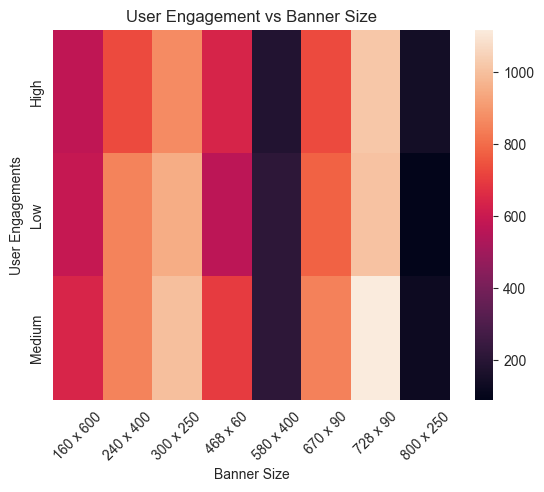

In [86]:
sns.heatmap(user_banner)
plt.title('User Engagement vs Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('User Engagements')
plt.xticks(rotation = 45)
plt.show()

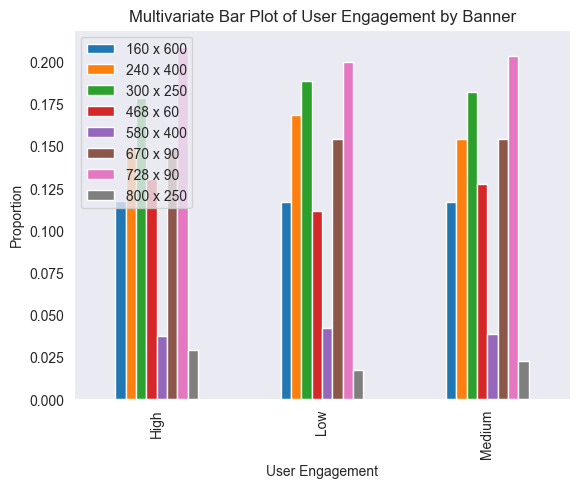

In [57]:
pd.crosstab(df['user_engagement'],df['banner'],normalize='index').plot(kind = 'bar')
plt.xlabel('User Engagement')
plt.ylabel('Proportion')
plt.title('Multivariate Bar Plot of User Engagement by Banner')
plt.legend(loc='upper left')
plt.show()

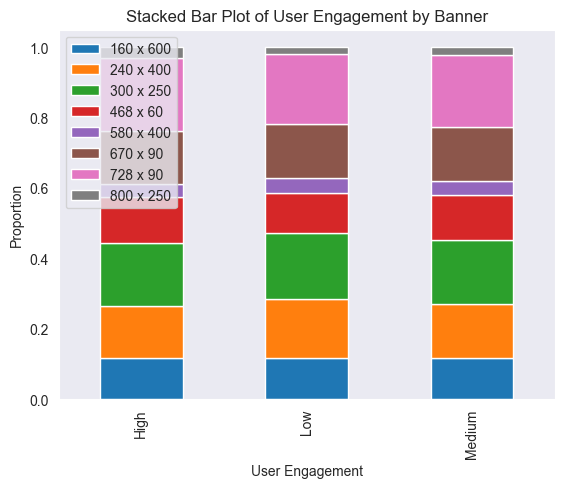

In [58]:
user_eng_banner_df = pd.crosstab(df['user_engagement'],df['banner'],normalize='index')
user_eng_banner_df.plot(kind='bar', stacked=True)
plt.xlabel('User Engagement')
plt.ylabel('Proportion')
plt.title('Stacked Bar Plot of User Engagement by Banner')
plt.legend(loc='upper left')
plt.show()

**Concise summary of the user engagement trends based on banner size is as follows:**
- Engagement levels across both 160 x 600 and 728 x 90 banners were largely comparable, with a slight preference towards 'medium' engagement.
- 'Medium' engagement takes precedence in both 300 x 250 and 670 x 90 banners, followed by 'low' and then 'high' engagement levels.
- Engagement levels are equivalent between 'low' and 'medium' for both 240 x 400 and 580 x 400 banners, both of which exceed 'high' engagement levels.
- In the case of the 468 x 60 banner, 'medium' engagement takes the lead in user engagement.
- In the case of the largest banner size, 800 x 250, 'high' user engagement predominates over the other categories.
- Hence the distribution of user engagement levels and banner size is non-uniform.

**These trends are depicted visually in a heatmap, stacked bar graph, and multivariable bar graph, providing insights into the varying levels of user engagement across different banner sizes.**


**Q9) Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?**

In [59]:
df[['campaign_number','clicks','displays']]

,campaign_number,clicks,displays
0,camp 1,0,4
1,camp 1,158,20170
2,camp 1,158,14701
3,camp 1,1796,171259
4,camp 1,1,552
...,...,...,...
15398,camp 3,40,5963
15399,camp 3,22,710
15400,camp 3,8,490
15401,camp 3,195,37790


**Correlation Coefficient**

In [60]:
df['clicks'].corr(df['displays'])

0.7669649010962477

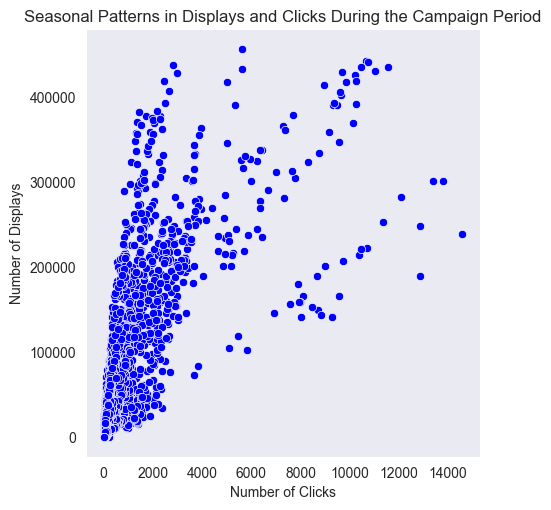

In [61]:
sns.relplot(kind = 'scatter',data = df,x = 'clicks',y = 'displays',color = 'blue')
plt.title('Seasonal Patterns in Displays and Clicks During the Campaign Period')
plt.xlabel('Number of Clicks')
plt.ylabel('Number of Displays')
plt.show()

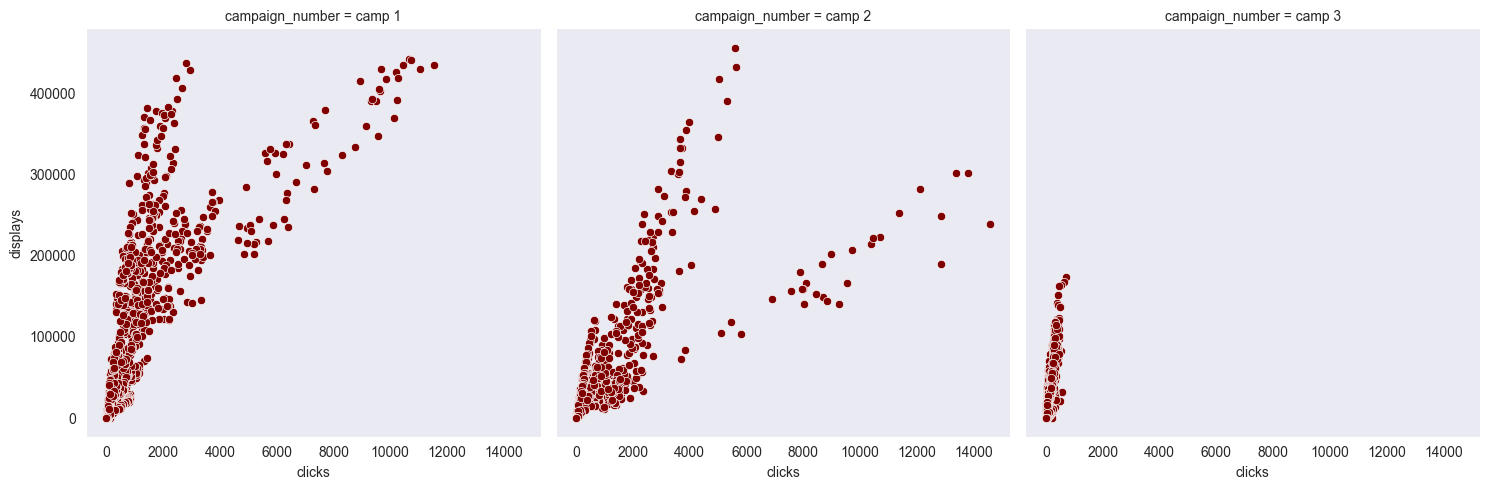

In [62]:
sns.relplot(kind = 'scatter',data = df,x = 'clicks',y = 'displays',col = 'campaign_number',color = 'maroon')
plt.show()

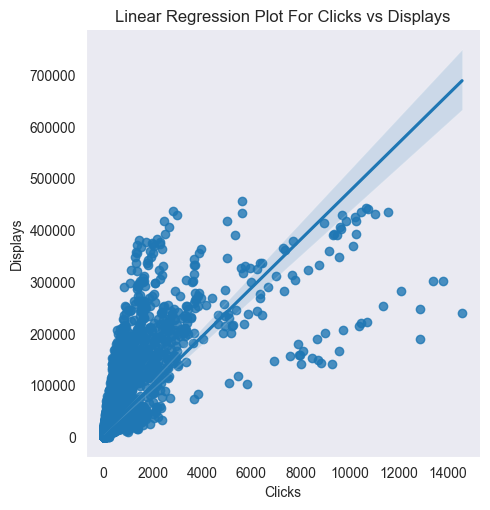

In [87]:
sns.lmplot(data = df , x = 'clicks',y = 'displays')
plt.title('Linear Regression Plot For Clicks vs Displays')
plt.xlabel('Clicks')
plt.ylabel('Displays')
plt.show()

**Conclusions for relationship between number of clicks and displays throughout the campaign period.**
- The correlation coefficient between clicks and displays is 0.7669, indicating a strong positive correlation between these two variables.
- Outliers, such as instances where the number of clicks exceeds 12,000 while the displays fall within the range of 200,000 to 300,000, are present in the dataset. These outliers represent data points that significantly deviate from the overall pattern observed in the scatter plot.
- According to the Linear Regression Model, it suggests that the displays for the above outliers should have been around 700,000, indicating a substantial difference from the observed values.
- Comparing displays with respect to 2000 clicks, Campaign 1 exhibits the maximum number of displays, followed by Campaign 2. Unfortunately, the number of clicks in Campaign 3 is significantly low, falling below the 2000 threshold.

**Q10) Is there a correlation between user engagement levels and the revenue generated?**

In [64]:
df[['user_engagement','revenue']]

,user_engagement,revenue
0,High,0.000000
1,High,28.968750
2,High,28.984375
3,High,329.500000
4,Low,0.183350
...,...,...
15398,Medium,2.251953
15399,Medium,1.238281
15400,Medium,0.450439
15401,Medium,10.976562


In [65]:
pd.pivot_table(data = df,index = 'user_engagement',values='revenue',aggfunc=['sum','mean','median','max','min'])

,sum,mean,median,max,min
,revenue,revenue,revenue,revenue,revenue
user_engagement,,,,,
High,212264.354065,43.487882,0.654297,2096.000000,0.0
Low,5144.460815,1.022146,0.161133,30.578125,0.0
Medium,58854.194550,10.722207,1.250977,588.500000,0.0


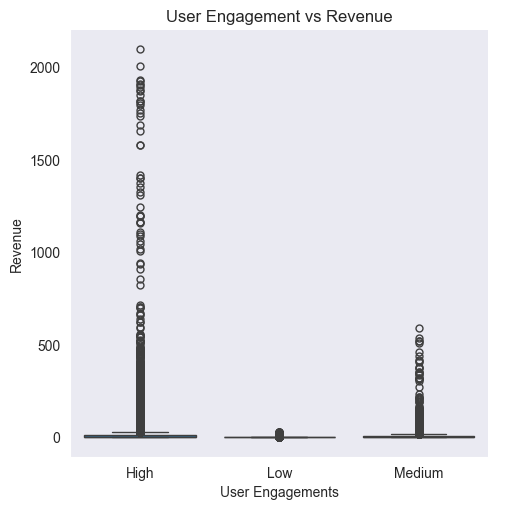

In [66]:
sns.catplot(kind = 'box',data = df,x = 'user_engagement',y = 'revenue')
plt.title('User Engagement vs Revenue')
plt.xlabel('User Engagements')
plt.ylabel('Revenue')
plt.show()

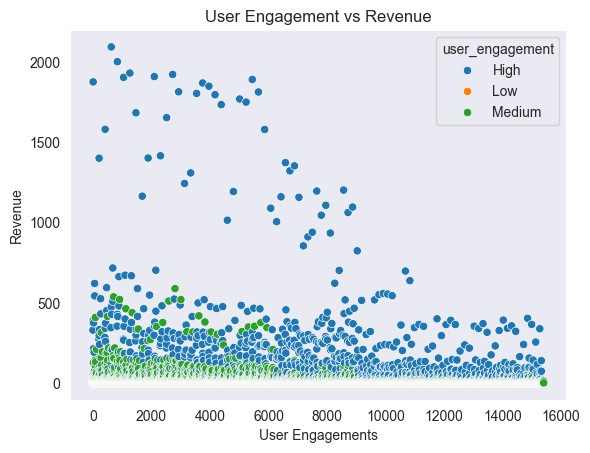

In [67]:
sns.scatterplot(data = df,x = df.index,y = 'revenue',hue = 'user_engagement')
plt.title('User Engagement vs Revenue')
plt.xlabel('User Engagements')
plt.ylabel('Revenue')
plt.show()

In [68]:
from pandas import factorize

labels, categories = factorize(df['user_engagement'])
df['labels'] = labels
abs(df['revenue'].corr(df['labels']))

0.13447338105403794

**Conclusions regarding the correlation between user engagement levels and revenue generation.**
- Total and mean revenue is maximized when targeting users with 'high' engagement levels, followed by those with 'medium' and 'low' engagement levels, respectively.
- Despite the low median revenues overall, the "medium" engagement group's median revenue surpasses that of the "high" group, which in turn exceeds that of the "low" group.
- Outliers are present across all sections, particularly notable in the high and medium user engagement categories.
- The correlation between user engagement and revenue generated is negligible, with a coefficient of 0.1344.

**Q11)Which placement types result in the highest post-click conversion rates?** 

In [69]:
q11_df = df[df['updated_placement'].isin(['abc','def','ghi','jkl','mno'])]
updated_index = q11_df['updated_placement'] != 'No Data Available'
q11_df = q11_df.pivot_table(index = 'updated_placement',values = ['clicks','post_click_conversions'],aggfunc='sum')
q11_df['post_click_conversions_rate'] = (q11_df['post_click_conversions'] / q11_df['clicks']) * 100
q11_df

,clicks,post_click_conversions,post_click_conversions_rate
updated_placement,,,
No Data Available,0,0,NaN
abc,1584,824,52.020202
def,176095,29853,16.952781
ghi,1247049,337063,27.028850
jkl,75063,20853,27.780664
mno,993029,263167,26.501442


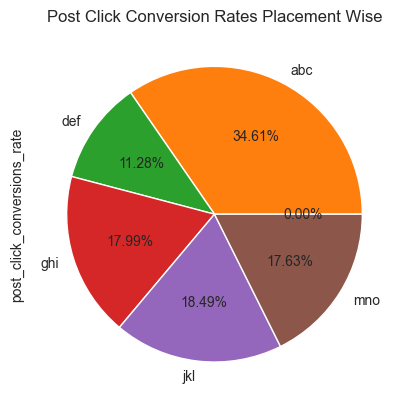

In [70]:
q11_df['post_click_conversions_rate'].plot(kind = 'pie',autopct = '%0.02f%%')
plt.title('Post Click Conversion Rates Placement Wise')
plt.show()
## 0.00% is for NaN values which we assigned 'No Data Available'

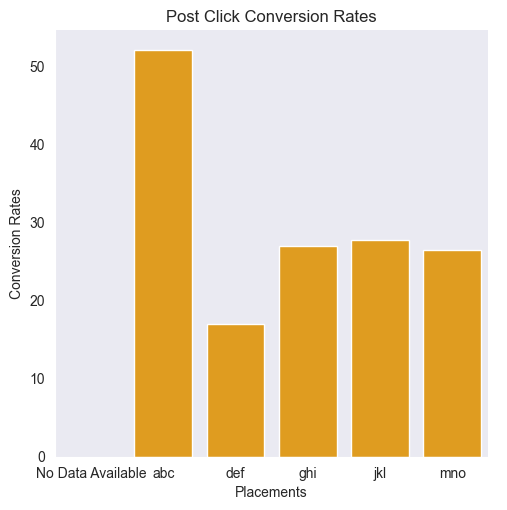

In [71]:
sns.catplot(kind = 'bar',x = q11_df.index,y = q11_df['post_click_conversions_rate'],color='orange')
plt.title('Post Click Conversion Rates')
plt.xlabel('Placements')
plt.ylabel('Conversion Rates')
plt.show()

**The findings regarding placement types associated with the highest post-click conversion rates are as follows:**
- The publisher 'abc' stands out with an impressive post-click conversion rate of 52.02%, showcasing its dominance in this aspect.
- The publishers 'ghi', 'jkl', and 'mno' demonstrate nearly identical conversion rates, all slightly surpassing half of that achieved by 'abc'.
- The conversion rate for 'def' is the lowest among all publishers.